In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
import cv2 
photo1= cv2.imread("/content/dog.jpg") 
photo2=  cv2.imread("/content/fruits.jpg") 
def lbp(photo):
  import cv2 
  import numpy as np 
  def assign_bit(picture, x, y, c):   #comparing bit with threshold value of centre pixel
      bit = 0  
      try:          
          if picture[x][y] >= c: 
              bit = 1         
      except: 
          pass
      return bit 
  def local_bin_val(picture, x, y):  #calculating local binary pattern value of a pixel
      eight_bit_binary = []
      centre = picture[x][y] 
      powers = [1, 2, 4, 8, 16, 32, 64, 128] 
      decimal_val = 0
      #starting from top right,assigning bit to pixels clockwise 
      eight_bit_binary.append(assign_bit(picture, x-1, y + 1,centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y, centre))     
      #calculating decimal value of the 8-bit binary number
      for i in range(len(eight_bit_binary)): 
          decimal_val += eight_bit_binary[i] * powers[i] 
            
      return decimal_val 
  m, n, _ = photo.shape 
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  lbp_photo = np.zeros((m, n),np.uint8) 
  # converting image to lbp
  for i in range(0,m): 
      for j in range(0,n): 
          lbp_photo[i, j] = local_bin_val(gray_scale, i, j) 
 
  return lbp_photo

l=lbp(photo1)
from matplotlib import pyplot as plt
plt.imshow(l, cmap ="gray") 
plt.show()
l

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
import os
if not os.path.isdir("MangoLeaf"):
  os.makedirs("MangoLeaf")

In [ ]:
%cd MangoLeaf

/content/gdrive/MyDrive/MangoLeaf


In [ ]:
!pwd

/content/gdrive/MyDrive/MangoLeaf


In [ ]:
!pip install tensorflow

In [ ]:
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [ ]:
#EDA

len(os.listdir("/content/gdrive/MyDrive/MangoLeaf/MangoV1/train") )

9

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= preprocess_input )

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input )

In [ ]:

train = train_datagen.flow_from_directory(directory= "/content/gdrive/MyDrive/MangoLeaf/MangoV1/train", 
                                           target_size= (256,256), batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/gdrive/MyDrive/MangoLeaf/MangoV1/valid", 
                                           target_size= (256,256), batch_size=32)

Found 208 images belonging to 9 classes.
Found 69 images belonging to 9 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
def plotImage(img_arr, label ):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

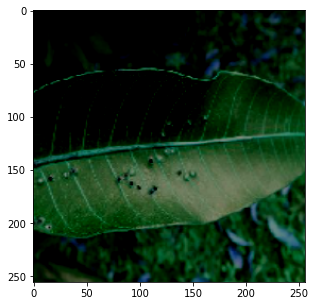

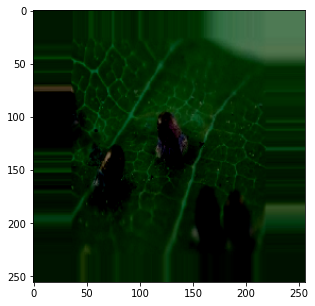

In [ ]:
plotImage(t_img[:2], label[:2])

In [ ]:

#Model Building#####

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x = Flatten()(base_model.output)

x = Dense(units= 9, activation= 'softmax')(x)

model = Model(base_model.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy , metrics=['accuaracy'] )

In [ ]:
#Model Check point#

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience=3, verbose=1)

#check pointbest_model.h5
mc = ModelCheckpoint(filepath="",
                     monitor= 'val_accuracy',
                     min_delta= 0.01,
                     patience=3, 
                     verbose=1 , 
                     save_best_only= True)

cb = [es, mc]

In [ ]:
from keras import callbacks
history = model.fit_generator(train,
                              steps_per_epoch=16,
                              epochs=20,
                              verbose=1,
                              callbacks= cb ,
                              validation_data= val ,
                              validation_steps= 16 )







 
     


NameError: ignored